In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "ebayAuctions.xlsx"
df = pd.read_excel(file_path, sheet_name='eBay auctions', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [7]:
df.columns = [col.strip() for col in df.columns]
df.columns = [col.replace("?","") for col in df.columns]
df.rename(columns={"sellerRating": "SellerRating", "endDay": "EndDay"}, inplace=True)
df.head()

,Category,Currency,SellerRating,Duration,EndDay,ClosePrice,OpenPrice,Competitive
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   SellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   EndDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive   1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


,SellerRating,Duration,ClosePrice,OpenPrice,Competitive
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [10]:
df['Competitive'] = df['Competitive'].astype(bool)

In [11]:
numeric = df.select_dtypes(include=[np.number]).columns.tolist()
categorical = df.select_dtypes(include=['object','category']).columns.tolist()

numeric, categorical

(['SellerRating', 'Duration', 'ClosePrice', 'OpenPrice'],
 ['Category', 'Currency', 'EndDay'])

In [12]:
def mark_outliers(s, lower=0.01, upper=0.99):
    lo, hi = s.quantile([lower, upper])
    return (s < lo) | (s > hi)

# Only continuous features
cont_cols = ['OpenPrice', 'ClosePrice', 'SellerRating']

for c in cont_cols:
    df[f"{c}_outlier"] = mark_outliers(df[c])

In [13]:
dummies = pd.get_dummies(df[categorical], drop_first=False)
data = pd.concat([df[numeric + ['Competitive']], dummies], axis=1)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SellerRating                   1972 non-null   int64  
 1   Duration                       1972 non-null   int64  
 2   ClosePrice                     1972 non-null   float64
 3   OpenPrice                      1972 non-null   float64
 4   Competitive                    1972 non-null   bool   
 5   Category_Antique/Art/Craft     1972 non-null   bool   
 6   Category_Automotive            1972 non-null   bool   
 7   Category_Books                 1972 non-null   bool   
 8   Category_Business/Industrial   1972 non-null   bool   
 9   Category_Clothing/Accessories  1972 non-null   bool   
 10  Category_Coins/Stamps          1972 non-null   bool   
 11  Category_Collectibles          1972 non-null   bool   
 12  Category_Computer              1972 non-null   b

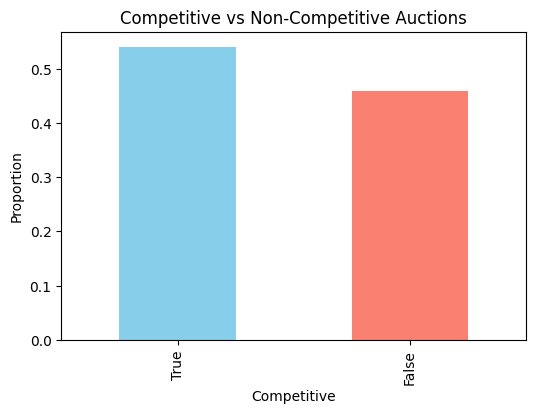

In [14]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(1,1,1)
counts = df['Competitive'].value_counts(normalize=True).plot(kind='bar', color=['skyblue','salmon'])
plt.title("Competitive vs Non-Competitive Auctions")
plt.ylabel("Proportion")
plt.show()

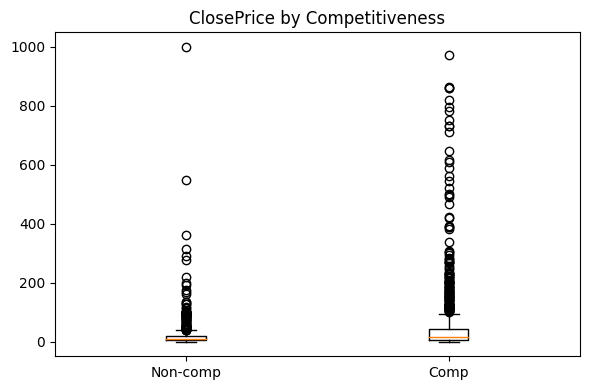

In [15]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)
lp0 = (df.loc[df['Competitive']==0,'ClosePrice'].dropna())
lp1 = (df.loc[df['Competitive']==1,'ClosePrice'].dropna())
ax2.boxplot([lp0, lp1], labels=['Non-comp','Comp'])
ax2.set_title('ClosePrice by Competitiveness')
plt.tight_layout()
plt.show()

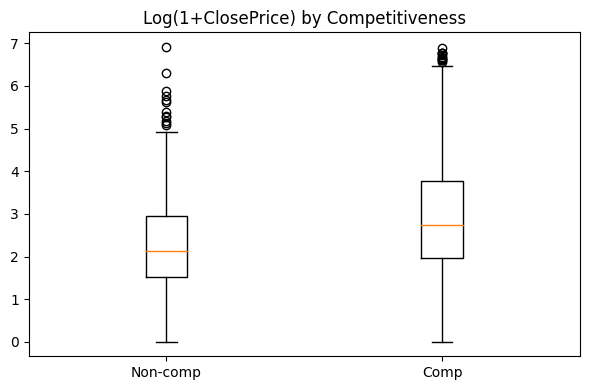

In [16]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)
lp0 = np.log1p(df.loc[df['Competitive']==0,'ClosePrice'].dropna())
lp1 = np.log1p(df.loc[df['Competitive']==1,'ClosePrice'].dropna())
ax2.boxplot([lp0, lp1], labels=['Non-comp','Comp'])
ax2.set_title('Log(1+ClosePrice) by Competitiveness')
plt.tight_layout()
plt.show()

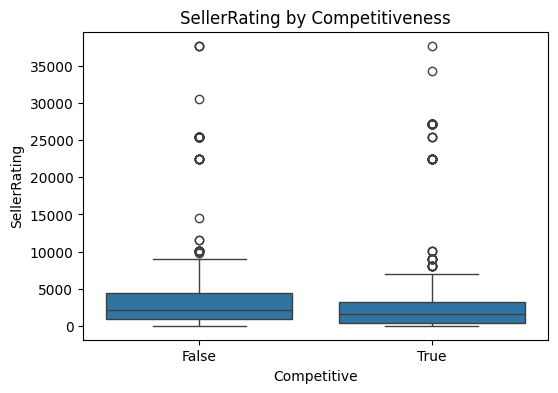

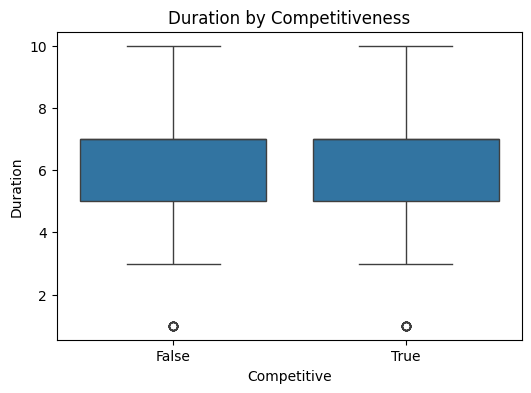

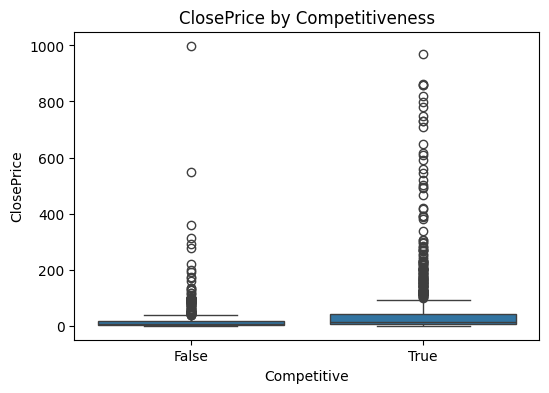

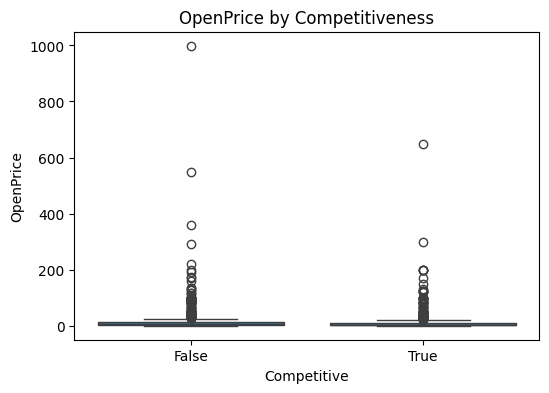

In [17]:
for col in numeric:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Competitive', y=col, data=df)
    plt.title(f"{col} by Competitiveness")
    plt.show()

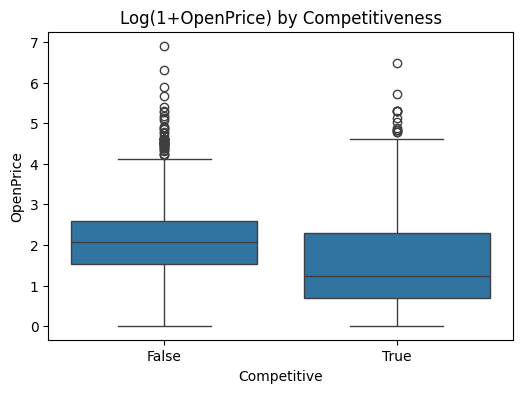

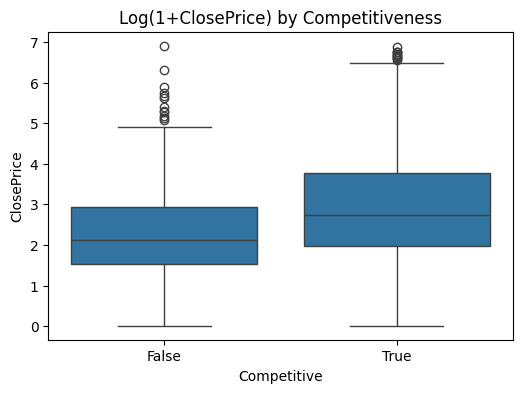

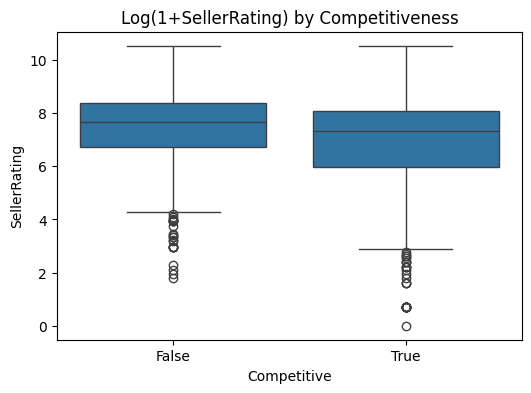

In [18]:
log_cols = ['OpenPrice', 'ClosePrice', 'SellerRating']

# Log-scale plots
for col in log_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Competitive', y=np.log1p(df[col]), data=df)
    plt.title(f"Log(1+{col}) by Competitiveness")
    plt.show()

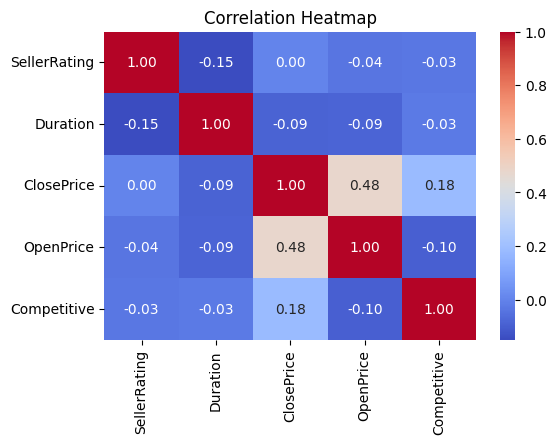

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric + ['Competitive']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/var/folders/85/7hj2vtt15h35hcldl16nn4jc0000gn/T/ipykernel_42169/1719168636.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")


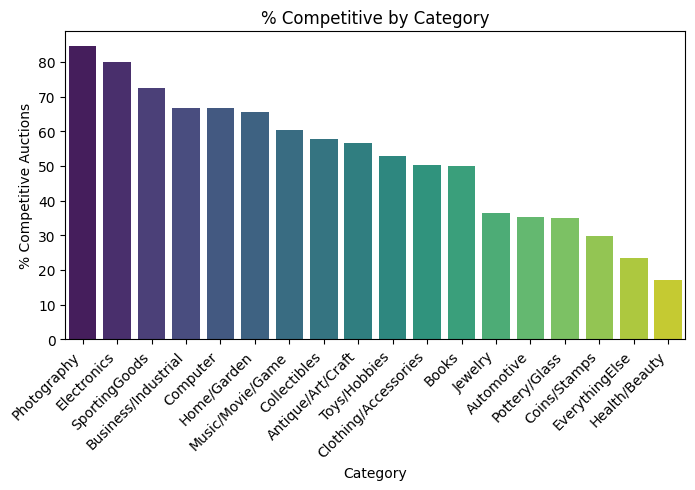

/var/folders/85/7hj2vtt15h35hcldl16nn4jc0000gn/T/ipykernel_42169/1719168636.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")


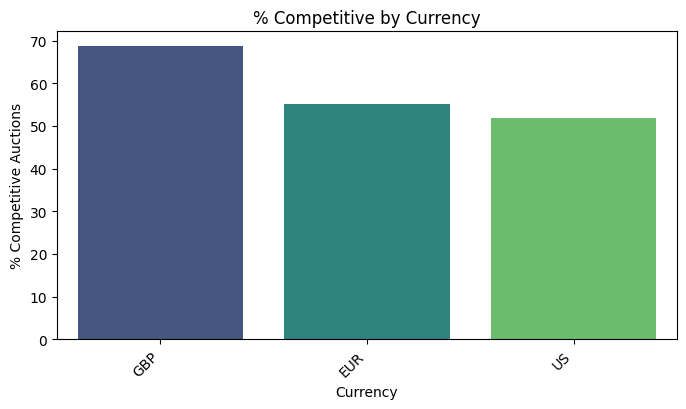

/var/folders/85/7hj2vtt15h35hcldl16nn4jc0000gn/T/ipykernel_42169/1719168636.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")


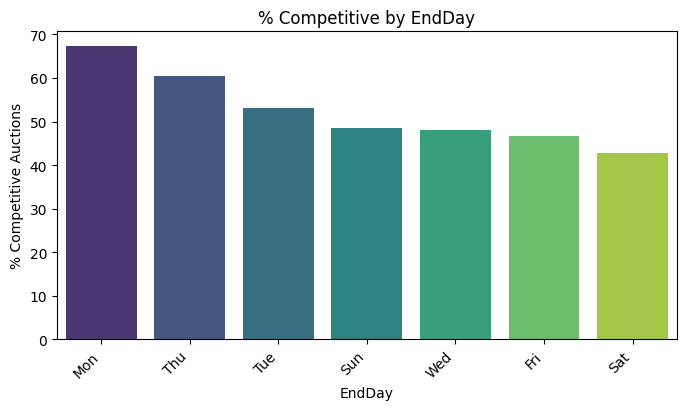

In [20]:
for col in categorical:
    comp_rates = df.groupby(col)['Competitive'].mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(8,4))
    sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")
    plt.title(f"% Competitive by {col}")
    plt.ylabel("% Competitive Auctions")
    plt.xticks(rotation=45, ha="right")
    plt.show()

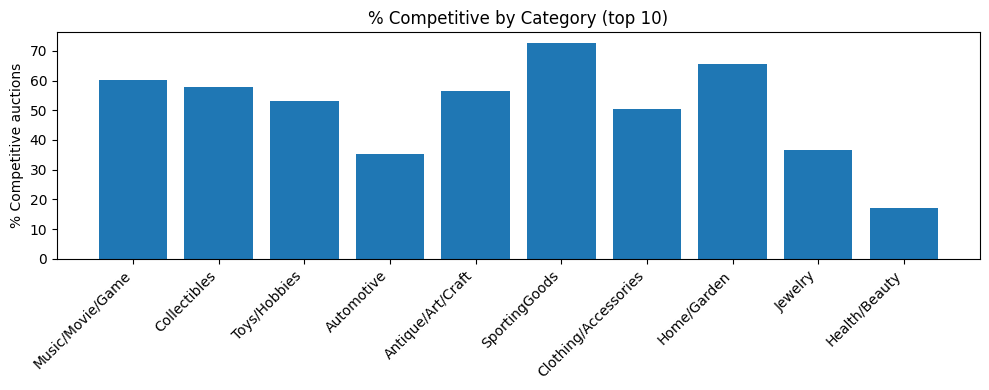

In [21]:
topcats = df['Category'].value_counts().nlargest(10).index.tolist() # top 10 categories by frequency
# filter only those 10 categories
# average of "competitive" (True=1), % competitive
# reorder to match frequency ranking
perc_comp = (df[df['Category'].isin(topcats)].groupby(df['Category'])['Competitive'].mean() * 100).reindex(topcats)                      
fig3 = plt.figure(figsize=(10,4))
ax3 = fig3.add_subplot(1,1,1)
ax3.bar(range(len(topcats)), perc_comp)
ax3.set_xticks(range(len(topcats)))
ax3.set_xticklabels(topcats, rotation=45, ha='right')
ax3.set_ylabel('% Competitive auctions')
ax3.set_title(f"% Competitive by Category (top {len(topcats)})")
plt.tight_layout()
plt.show()

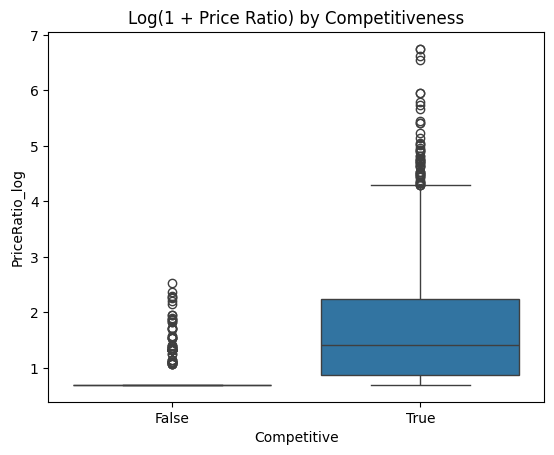

In [22]:
# Sometimes it’s not the absolute prices but the markup that drives competitiveness.
# If price_ratio ≈ 1, auction closed near opening price, not many bids.
# If price_ratio >> 1, price grew a lot, competitive bidding.
# Log-transform price ratio
df['PriceRatio'] = (df['ClosePrice'] + 1) / (df['OpenPrice'] + 1)
df['PriceRatio_log'] = np.log1p(df['PriceRatio'])
sns.boxplot(x='Competitive', y='PriceRatio_log', data=df)
plt.title("Log(1 + Price Ratio) by Competitiveness")
plt.show()


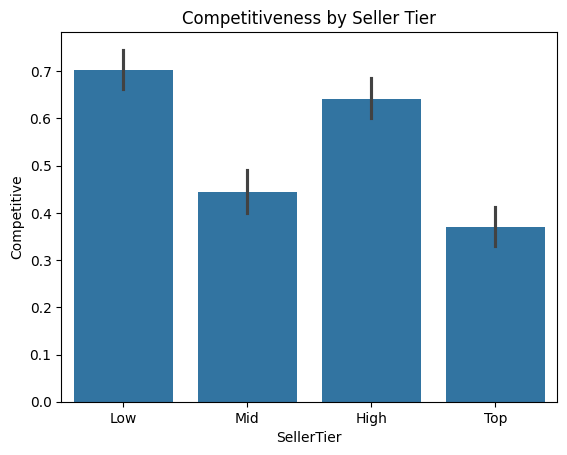

In [23]:
# Seller ratings are highly skewed; cut them into bins (newbie, mid, pro, power seller).
# Competitive auctions might be concentrated in trusted sellers.
df['SellerTier'] = pd.qcut(df['SellerRating'], q=4, labels=["Low","Mid","High","Top"])
sns.barplot(x='SellerTier', y='Competitive', data=df, estimator=np.mean)
plt.title("Competitiveness by Seller Tier")
plt.show()

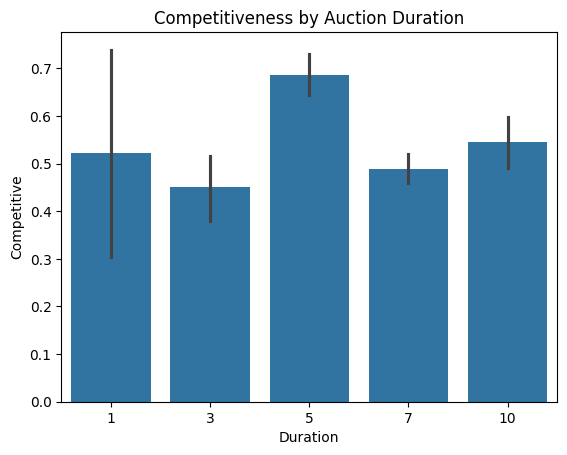

In [24]:
# Auctions of 3, 5, 7, 10 days may show very different competitiveness rates.
# A short 3-day auction might get fewer bids, but 7-day might build hype.
sns.barplot(x='Duration', y='Competitive', data=df, estimator=np.mean)
plt.title("Competitiveness by Auction Duration")
plt.show()

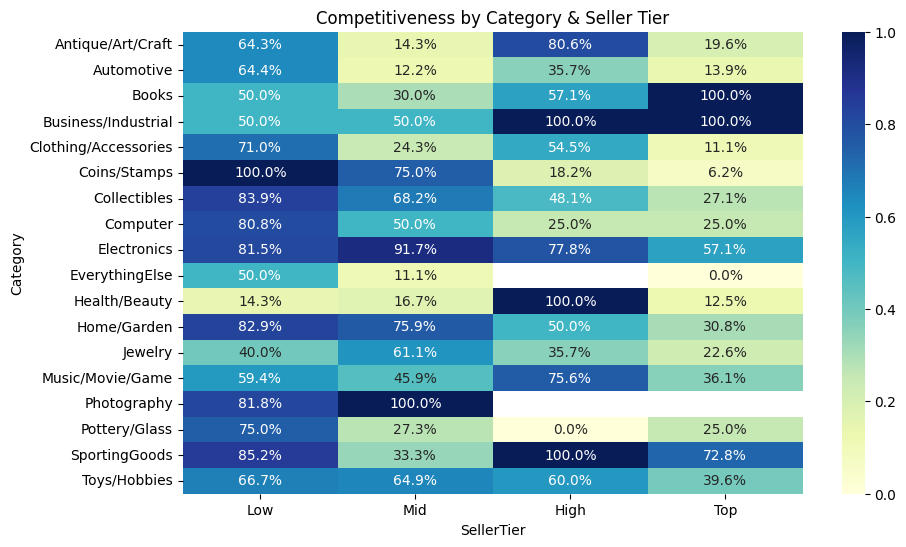

In [25]:
# Maybe high-rated sellers dominate competitive categories (e.g. Electronics, Jewelry).
# Heatmap can reveal that interaction.
pivot = df.pivot_table(index="Category", columns="SellerTier", values="Competitive", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1%", cmap="YlGnBu")
plt.title("Competitiveness by Category & Seller Tier")
plt.show()